C:\Users\cdcas\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cdcas\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\cdcas\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

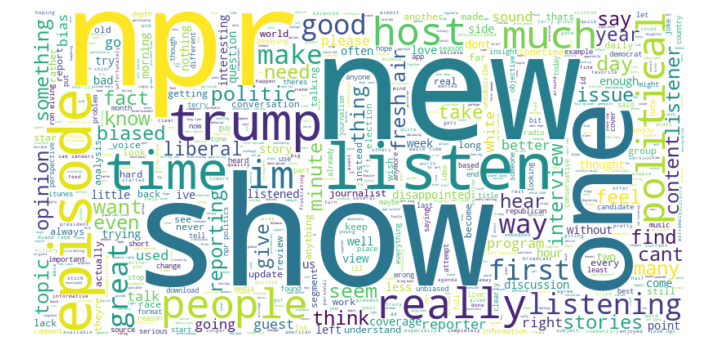

In [18]:
import pandas as pd
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

onea = pd.read_csv('NPR.1A.csv')
codeswitch = pd.read_csv('NPR.CodeSwitch.csv')
embedded = pd.read_csv('NPR.Embedded.csv')
freshair = pd.read_csv('NPR.FreshAir.csv')
herenow = pd.read_csv('NPR.HereAndNow.csv')
latinousa = pd.read_csv('NPR.LatinoUSA.csv')
news = pd.read_csv('NPR.NewsNow.csv')
politics = pd.read_csv('NPR.Politics.csv')
upfirst = pd.read_csv('NPR.UpFirst.csv')

total = pd.read_csv("NPR.Total.csv")

onedf = total.loc[total.Rating < 4]

shows = [onea, codeswitch, embedded, freshair, herenow, latinousa, news, politics, upfirst]

def nprcloud(theshow) :
    theshow['Body'] = theshow['Body'].str.lower()
    stop = stopwords.words('english')
    theshow['Body'] = theshow['Body'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    theshow['Body'] = theshow['Body'].apply(lambda x: re.sub('[^\w\s]', '', x))
    theshow['Body'] = theshow['Body'].apply(lambda x: re.sub('podcast', '', x))
    wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
    wc.generate(' '.join(theshow['Body']))
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

nprcloud(onedf)

In [17]:
onedf = total.loc[total.Rating < 4]

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from textblob import TextBlob

sample_size = len(total)

def sentiment_func(x):
    sample_size = len(x)
    sentiment = TextBlob(x['Body'])
    x['Polarity'] = sentiment.polarity
    x['Subjectivity'] = sentiment.subjectivity
    return x

sample = total.sample(sample_size, replace=False).apply(sentiment_func, axis=1)

sample.to_csv("NPR.sample.csv")

In [23]:
sample.plot.boxplot('Rating', 'Polarity')

AttributeError: 'FramePlotMethods' object has no attribute 'boxplot'